In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt

In [ ]:
TOTAL_USERS = 10000
ADS_PER_USER = 10
TOTAL_ADS = TOTAL_USERS * ADS_PER_USER


In [ ]:
JAIPUR_AREAS = [

"Malviya Nagar","Vaishali Nagar","Mansarovar","Jagatpura","Pratap Nagar",
"C Scheme","Civil Lines","Raja Park","Sanganer","Ajmer Road","Bapu Nagar",
"Sodala","Durgapura","Gopalpura","Jhotwara","Bani Park","Shyam Nagar",
"Tonk Road","Vidhyadhar Nagar","Nirman Nagar","Ambabari","Sirsi Road",
"Mahesh Nagar","Lal Kothi","Transport Nagar","Sitapura","Chitrakoot",
"Hasanpura","Patrakar Colony","Adarsh Nagar","Subhash Nagar","Brahmpuri",
"Tilak Nagar","Shastri Nagar","Khatipura","Murlipura","Kalwar Road",
"Harmada","Bhankrota","Mahapura","Sirsi Extension","Kukas","Amer Road",
"Kanota","Achrol","Bagru","Phagi","Chaksu","Jobner Road","Bindayaka",
"Vatika","Beelwa","Agra Road","Jamwa Ramgarh","Gandhi Path","Queens Road",
"New Sanganer Road","Gopalpura Bypass","Triveni Nagar","SFS Mansarovar",
"Heerapura","Kartarpura","Barkat Nagar"
]


In [ ]:
ADJ = ["premium","modern","stylish","elegant","bold","fresh","classic",
       "smart","vibrant","minimal","refined","urban","sleek","comfortable","trendy"]

NOUN = ["fashion","clothing","outfits","apparel","collection","designs",
        "styles","wardrobe","wear","garments"]

VERB = ["crafted","designed","created","tailored","built","made","prepared","curated"]

BENEFIT = [
"for everyday comfort","for modern lifestyle","for confident look",
"for effortless wear","for premium feel","for lasting durability",
"for active routine","for smart appearance"
]

CTA = [
"shop today","explore now","grab the offer","discover more",
"upgrade your style","refresh your wardrobe","experience better fashion"
]

TEMPLATES = [
"{a} {n} {v} {b} {c}",
"{v} {a} {n} {b} {c}",
"{c} with {a} {n} {b}",
"{a} {n} that feels {b} {c}",
"{c} and enjoy {a} {n} {b}",
"{v} for {a} {n} lovers {c}",
"{a} {n} specially {v} {b} {c}",
"{c} your {a} {n} {b}"
]


def generate_unique_sentences(count):

    sentences = set()

    while len(sentences) < count:

        t = random.choice(TEMPLATES)

        s = t.format(
            a=random.choice(ADJ),
            n=random.choice(NOUN),
            v=random.choice(VERB),
            b=random.choice(BENEFIT),
            c=random.choice(CTA)
        )

        sentences.add(s)

    return list(sentences)


In [ ]:
keywords_pool  = generate_unique_sentences(TOTAL_ADS)
headlines_pool = generate_unique_sentences(TOTAL_ADS)
desc_pool      = generate_unique_sentences(TOTAL_ADS)
prompt_pool    = generate_unique_sentences(TOTAL_ADS)


In [ ]:
rows = []
k = 0

for user_id in range(1, TOTAL_USERS+1):

    user_description = f"User provided clothing campaign text {user_id}"

    price = random.randint(300, 3000)
    price_range = f"{price-200}-{price+500}"

    gender = random.choice(["Male","Female","Transgender","Other"])

    age_min = 1
    age_max = 100
    age_range = "one to hundred"

    locations = ",".join(random.sample(JAIPUR_AREAS, random.randint(4,7)))

    platform = random.choice(["Meta","Google"])
    ad_format = random.choice(["Image","Video"])

    total_budget = random.randint(800, 5000)
    daily_budget = random.randint(200, 1200)

    for ad_no in range(1, ADS_PER_USER+1):

        rows.append([
            user_id,
            ad_no,
            "Clothing",
            user_description,
            price,
            price_range,
            gender,
            age_min,
            age_max,
            age_range,
            locations,
            platform,
            ad_format,
            total_budget,
            daily_budget,
            keywords_pool[k],
            headlines_pool[k],
            desc_pool[k],
            prompt_pool[k]
        ])

        k += 1


In [ ]:
columns = [
"User_ID","Ad_No","Category","User_Description",
"Price","Price_Range","Gender","Age_Min","Age_Max","Age_Range",
"Locations","Platform","Format","Total_Budget","Daily_Budget",
"Keyword","Headline","Ad_Description","Image_Prompt"
]

df = pd.DataFrame(rows, columns=columns)

df.to_csv("adpattern_final_production.csv", index=False)

df.head()


,User_ID,Ad_No,Category,User_Description,Price,Price_Range,Gender,Age_Min,Age_Max,Age_Range,Locations,Platform,Format,Total_Budget,Daily_Budget,Keyword,Headline,Ad_Description,Image_Prompt
0,1,1,Clothing,User provided clothing campaign text 1,2496,2296-2996,Transgender,1,100,one to hundred,"Harmada,Raja Park,Mahesh Nagar,C Scheme",Google,Image,2897,464,urban styles specially tailored for modern lif...,stylish wear created for smart appearance expl...,urban styles specially tailored for modern lif...,premium fashion that feels for active routine ...
1,1,2,Clothing,User provided clothing campaign text 1,2496,2296-2996,Transgender,1,100,one to hundred,"Harmada,Raja Park,Mahesh Nagar,C Scheme",Google,Image,2897,464,elegant apparel specially created for everyday...,modern outfits specially prepared for lasting ...,premium fashion that feels for active routine ...,made for premium garments lovers explore now
2,1,3,Clothing,User provided clothing campaign text 1,2496,2296-2996,Transgender,1,100,one to hundred,"Harmada,Raja Park,Mahesh Nagar,C Scheme",Google,Image,2897,464,premium fashion that feels for active routine ...,premium fashion that feels for active routine ...,made for premium garments lovers explore now,made sleek fashion for active routine explore now
3,1,4,Clothing,User provided clothing campaign text 1,2496,2296-2996,Transgender,1,100,one to hundred,"Harmada,Raja Park,Mahesh Nagar,C Scheme",Google,Image,2897,464,made for premium garments lovers explore now,made for premium garments lovers explore now,crafted sleek outfits for active routine explo...,grab the offer and enjoy smart styles for last...
4,1,5,Clothing,User provided clothing campaign text 1,2496,2296-2996,Transgender,1,100,one to hundred,"Harmada,Raja Park,Mahesh Nagar,C Scheme",Google,Image,2897,464,modern outfits specially crafted for modern li...,modern outfits specially crafted for modern li...,created trendy designs for active routine disc...,smart fashion curated for premium feel refresh...


In [ ]:
df.head(20)

,User_ID,Ad_No,Category,User_Description,Price,Price_Range,Gender,Age_Min,Age_Max,Age_Range,Locations,Platform,Format,Total_Budget,Daily_Budget,Keyword,Headline,Ad_Description,Image_Prompt
0,1,1,Clothing,User provided clothing campaign text 1,2496,2296-2996,Transgender,1,100,one to hundred,"Harmada,Raja Park,Mahesh Nagar,C Scheme",Google,Image,2897,464,urban styles specially tailored for modern lif...,stylish wear created for smart appearance expl...,urban styles specially tailored for modern lif...,premium fashion that feels for active routine ...
1,1,2,Clothing,User provided clothing campaign text 1,2496,2296-2996,Transgender,1,100,one to hundred,"Harmada,Raja Park,Mahesh Nagar,C Scheme",Google,Image,2897,464,elegant apparel specially created for everyday...,modern outfits specially prepared for lasting ...,premium fashion that feels for active routine ...,made for premium garments lovers explore now
2,1,3,Clothing,User provided clothing campaign text 1,2496,2296-2996,Transgender,1,100,one to hundred,"Harmada,Raja Park,Mahesh Nagar,C Scheme",Google,Image,2897,464,premium fashion that feels for active routine ...,premium fashion that feels for active routine ...,made for premium garments lovers explore now,made sleek fashion for active routine explore now
3,1,4,Clothing,User provided clothing campaign text 1,2496,2296-2996,Transgender,1,100,one to hundred,"Harmada,Raja Park,Mahesh Nagar,C Scheme",Google,Image,2897,464,made for premium garments lovers explore now,made for premium garments lovers explore now,crafted sleek outfits for active routine explo...,grab the offer and enjoy smart styles for last...
4,1,5,Clothing,User provided clothing campaign text 1,2496,2296-2996,Transgender,1,100,one to hundred,"Harmada,Raja Park,Mahesh Nagar,C Scheme",Google,Image,2897,464,modern outfits specially crafted for modern li...,modern outfits specially crafted for modern li...,created trendy designs for active routine disc...,smart fashion curated for premium feel refresh...
5,1,6,Clothing,User provided clothing campaign text 1,2496,2296-2996,Transgender,1,100,one to hundred,"Harmada,Raja Park,Mahesh Nagar,C Scheme",Google,Image,2897,464,made sleek fashion for active routine explore now,crafted sleek outfits for active routine explo...,grab the offer and enjoy smart styles for last...,comfortable clothing curated for effortless we...
6,1,7,Clothing,User provided clothing campaign text 1,2496,2296-2996,Transgender,1,100,one to hundred,"Harmada,Raja Park,Mahesh Nagar,C Scheme",Google,Image,2897,464,refresh your wardrobe with premium wear for ef...,made sleek fashion for active routine explore now,made sleek fashion for active routine explore now,bold apparel made for lasting durability grab ...
7,1,8,Clothing,User provided clothing campaign text 1,2496,2296-2996,Transgender,1,100,one to hundred,"Harmada,Raja Park,Mahesh Nagar,C Scheme",Google,Image,2897,464,grab the offer and enjoy smart styles for last...,refresh your wardrobe with premium wear for ef...,bold collection specially curated for modern l...,experience better fashion your sleek apparel f...
8,1,9,Clothing,User provided clothing campaign text 1,2496,2296-2996,Transgender,1,100,one to hundred,"Harmada,Raja Park,Mahesh Nagar,C Scheme",Google,Image,2897,464,bold collection specially curated for modern l...,grab the offer and enjoy smart styles for last...,refresh your wardrobe with premium wear for ef...,minimal outfits specially designed for premium...
9,1,10,Clothing,User provided clothing campaign text 1,2496,2296-2996,Transgender,1,100,one to hundred,"Harmada,Raja Park,Mahesh Nagar,C Scheme",Google,Image,2897,464,minimal clothing curated for smart appearance ...,modern outfits designed for smart appearance u...,smart fashion curated for premium feel refresh...,crafted stylish styles for smart appearance ex...


In [ ]:
df.tail(20)

,User_ID,Ad_No,Category,User_Description,Price,Price_Range,Gender,Age_Min,Age_Max,Age_Range,Locations,Platform,Format,Total_Budget,Daily_Budget,Keyword,Headline,Ad_Description,Image_Prompt
99980,9999,1,Clothing,User provided clothing campaign text 9999,1925,1725-2425,Other,1,100,one to hundred,"Triveni Nagar,Sanganer,Vidhyadhar Nagar,Sirsi ...",Meta,Image,3091,1055,modern apparel that feels for effortless wear ...,refresh your wardrobe your stylish fashion for...,stylish collection tailored for active routine...,refined wear tailored for effortless wear grab...
99981,9999,2,Clothing,User provided clothing campaign text 9999,1925,1725-2425,Other,1,100,one to hundred,"Triveni Nagar,Sanganer,Vidhyadhar Nagar,Sirsi ...",Meta,Image,3091,1055,classic outfits crafted for confident look sho...,prepared bold wardrobe for confident look shop...,trendy garments built for effortless wear grab...,refresh your wardrobe with elegant collection ...
99982,9999,3,Clothing,User provided clothing campaign text 9999,1925,1725-2425,Other,1,100,one to hundred,"Triveni Nagar,Sanganer,Vidhyadhar Nagar,Sirsi ...",Meta,Image,3091,1055,curated vibrant apparel for everyday comfort e...,classic garments specially curated for active ...,elegant wardrobe built for everyday comfort sh...,refined outfits specially designed for premium...
99983,9999,4,Clothing,User provided clothing campaign text 9999,1925,1725-2425,Other,1,100,one to hundred,"Triveni Nagar,Sanganer,Vidhyadhar Nagar,Sirsi ...",Meta,Image,3091,1055,designed comfortable styles for everyday comfo...,curated elegant styles for confident look expe...,curated elegant styles for confident look expe...,refresh your wardrobe your stylish fashion for...
99984,9999,5,Clothing,User provided clothing campaign text 9999,1925,1725-2425,Other,1,100,one to hundred,"Triveni Nagar,Sanganer,Vidhyadhar Nagar,Sirsi ...",Meta,Image,3091,1055,curated sleek fashion for effortless wear grab...,modern apparel that feels for effortless wear ...,crafted refined wardrobe for confident look re...,crafted refined wardrobe for confident look re...
99985,9999,6,Clothing,User provided clothing campaign text 9999,1925,1725-2425,Other,1,100,one to hundred,"Triveni Nagar,Sanganer,Vidhyadhar Nagar,Sirsi ...",Meta,Image,3091,1055,designed stylish collection for modern lifesty...,curated comfortable clothing for confident loo...,modern apparel that feels for effortless wear ...,modern apparel that feels for effortless wear ...
99986,9999,7,Clothing,User provided clothing campaign text 9999,1925,1725-2425,Other,1,100,one to hundred,"Triveni Nagar,Sanganer,Vidhyadhar Nagar,Sirsi ...",Meta,Image,3091,1055,smart apparel that feels for active routine re...,classic outfits crafted for confident look sho...,built refined clothing for effortless wear sho...,designed comfortable styles for everyday comfo...
99987,9999,8,Clothing,User provided clothing campaign text 9999,1925,1725-2425,Other,1,100,one to hundred,"Triveni Nagar,Sanganer,Vidhyadhar Nagar,Sirsi ...",Meta,Image,3091,1055,curated smart garments for premium feel refres...,minimal collection specially made for premium ...,classic outfits crafted for confident look sho...,curated sleek fashion for effortless wear grab...
99988,9999,9,Clothing,User provided clothing campaign text 9999,1925,1725-2425,Other,1,100,one to hundred,"Triveni Nagar,Sanganer,Vidhyadhar Nagar,Sirsi ...",Meta,Image,3091,1055,classic styles created for modern lifestyle gr...,classic styles created for modern lifestyle gr...,designed stylish collection for modern lifesty...,designed stylish collection for modern lifesty...
99989,9999,10,Clothing,User provided clothing campaign text 9999,1925,1725-2425,Other,1,100,one to hundred,"Triveni Nagar,Sanganer,Vidhyadhar Nagar,Sirsi ...",Meta,Image,3091,1055,trendy clothing specially designed for lasting...,smart apparel that feels for active routine re...,smart apparel that feels for active routine re...,smart apparel that feels for active routine re...


In [ ]:
df.shape

(100000, 19)

In [ ]:
df.describe()

,User_ID,Ad_No,Price,Age_Min,Age_Max,Total_Budget,Daily_Budget
count,100000.000000,100000.000000,100000.000000,100000.0,100000.0,100000.00000,100000.000000
mean,5000.500000,5.500000,1652.283700,1.0,100.0,2897.53590,694.577700
std,2886.765765,2.872296,780.057681,0.0,0.0,1212.39229,290.659991
min,1.000000,1.000000,300.000000,1.0,100.0,800.00000,200.000000
25%,2500.750000,3.000000,974.000000,1.0,100.0,1846.00000,437.000000
50%,5000.500000,5.500000,1643.000000,1.0,100.0,2910.50000,694.000000
75%,7500.250000,8.000000,2334.000000,1.0,100.0,3947.00000,949.000000
max,10000.000000,10.000000,3000.000000,1.0,100.0,5000.00000,1200.000000


In [ ]:
df.isnull().sum

<bound method DataFrame.sum of        User_ID  Ad_No  Category  User_Description  Price  Price_Range  Gender  \
0        False  False     False             False  False        False   False   
1        False  False     False             False  False        False   False   
2        False  False     False             False  False        False   False   
3        False  False     False             False  False        False   False   
4        False  False     False             False  False        False   False   
...        ...    ...       ...               ...    ...          ...     ...   
99995    False  False     False             False  False        False   False   
99996    False  False     False             False  False        False   False   
99997    False  False     False             False  False        False   False   
99998    False  False     False             False  False        False   False   
99999    False  False     False             False  False        False   False 

In [ ]:
print("Total rows:", len(df))
print("Keywords unique:", df.Keyword.nunique())
print("Headlines unique:", df.Headline.nunique())
print("Descriptions unique:", df.Ad_Description.nunique())
print("Prompts unique:", df.Image_Prompt.nunique())


Total rows: 100000
Keywords unique: 100000
Headlines unique: 100000
Descriptions unique: 100000
Prompts unique: 100000


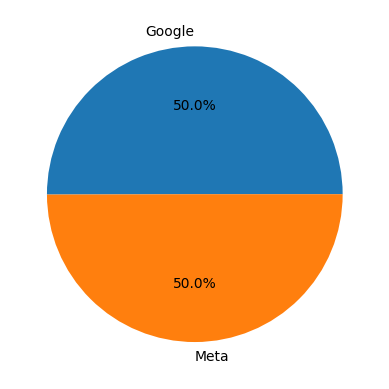

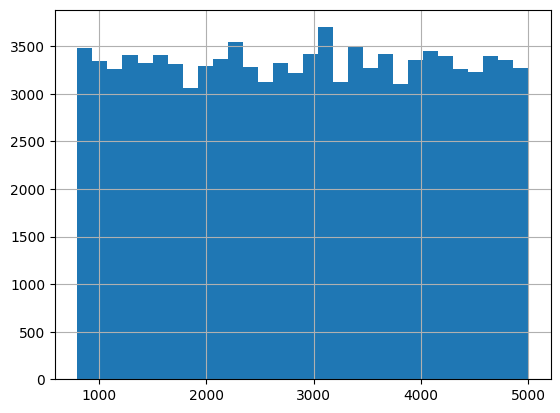

In [ ]:
df["Platform"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

df["Total_Budget"].hist(bins=30)
plt.show()


In [ ]:
print("Rows:", len(df))
print("Columns:", len(df.columns))

df.info()


Rows: 100000
Columns: 19
<class 'pandas.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   User_ID           100000 non-null  int64
 1   Ad_No             100000 non-null  int64
 2   Category          100000 non-null  str  
 3   User_Description  100000 non-null  str  
 4   Price             100000 non-null  int64
 5   Price_Range       100000 non-null  str  
 6   Gender            100000 non-null  str  
 7   Age_Min           100000 non-null  int64
 8   Age_Max           100000 non-null  int64
 9   Age_Range         100000 non-null  str  
 10  Locations         100000 non-null  str  
 11  Platform          100000 non-null  str  
 12  Format            100000 non-null  str  
 13  Total_Budget      100000 non-null  int64
 14  Daily_Budget      100000 non-null  int64
 15  Keyword           100000 non-null  str  
 16  Headline          100000 non-null  str  
 1

In [ ]:
df.sample(10)


,User_ID,Ad_No,Category,User_Description,Price,Price_Range,Gender,Age_Min,Age_Max,Age_Range,Locations,Platform,Format,Total_Budget,Daily_Budget,Keyword,Headline,Ad_Description,Image_Prompt
42997,4300,8,Clothing,User provided clothing campaign text 4300,317,117-817,Female,1,100,one to hundred,"Achrol,Bagru,Vatika,Phagi,Gandhi Path",Meta,Video,1113,617,urban clothing specially built for modern life...,refined designs specially tailored for everyda...,created bold apparel for lasting durability gr...,discover more and enjoy modern collection for ...
18041,1805,2,Clothing,User provided clothing campaign text 1805,987,787-1487,Male,1,100,one to hundred,"Bagru,Gopalpura,Brahmpuri,Bindayaka,Phagi",Meta,Image,2833,558,tailored stylish wear for effortless wear shop...,crafted bold garments for premium feel explore...,comfortable garments crafted for modern lifest...,shop today your sleek outfits for modern lifes...
2239,224,10,Clothing,User provided clothing campaign text 224,1743,1543-2243,Male,1,100,one to hundred,"Subhash Nagar,Beelwa,Amer Road,Bapu Nagar",Meta,Video,3795,568,bold styles made for everyday comfort grab the...,experience better fashion with vibrant clothin...,sleek clothing specially built for active rout...,bold styles tailored for confident look grab t...
84571,8458,2,Clothing,User provided clothing campaign text 8458,1880,1680-2380,Other,1,100,one to hundred,"Gopalpura,Jhotwara,Chaksu,Mansarovar",Google,Video,2991,818,crafted bold wear for confident look refresh y...,crafted for vibrant wear lovers upgrade your s...,fresh styles specially crafted for lasting dur...,comfortable wear prepared for smart appearance...
90718,9072,9,Clothing,User provided clothing campaign text 9072,723,523-1223,Female,1,100,one to hundred,"Transport Nagar,Bani Park,Amer Road,Jobner Road",Google,Image,4697,233,refined designs specially tailored for modern ...,explore now your classic wear for active routine,elegant collection tailored for active routine...,explore now with elegant garments for lasting ...
66532,6654,3,Clothing,User provided clothing campaign text 6654,1106,906-1606,Male,1,100,one to hundred,"Kalwar Road,Sirsi Road,Patrakar Colony,Triveni...",Google,Image,2703,1172,stylish designs specially tailored for active ...,comfortable wear specially created for smart a...,bold fashion tailored for smart appearance exp...,comfortable clothing made for everyday comfort...
31589,3159,10,Clothing,User provided clothing campaign text 3159,771,571-1271,Female,1,100,one to hundred,"Adarsh Nagar,Sirsi Road,Kanota,Kalwar Road,Sit...",Meta,Image,1620,528,elegant outfits that feels for active routine ...,crafted stylish garments for modern lifestyle ...,stylish apparel that feels for active routine ...,refresh your wardrobe with elegant collection ...
16555,1656,6,Clothing,User provided clothing campaign text 1656,1555,1355-2055,Male,1,100,one to hundred,"Bagru,Sirsi Road,Sanganer,Jamwa Ramgarh,SFS Ma...",Meta,Video,1335,885,tailored minimal wear for active routine exper...,upgrade your style your fresh wardrobe for eff...,urban apparel specially prepared for confident...,elegant outfits prepared for confident look di...
21412,2142,3,Clothing,User provided clothing campaign text 2142,2161,1961-2661,Male,1,100,one to hundred,"Bagru,Chaksu,Bapu Nagar,Transport Nagar,Kanota...",Google,Video,879,561,fresh apparel specially crafted for effortless...,trendy outfits specially made for lasting dura...,crafted for stylish clothing lovers explore now,created trendy apparel for lasting durability ...
83625,8363,6,Clothing,User provided clothing campaign text 8363,2690,2490-3190,Female,1,100,one to hundred,"Ajmer Road,Jamwa Ramgarh,Adarsh Nagar,Bapu Nag...",Meta,Image,3225,204,made for classic clothing lovers discover more,vibrant clothing specially built for modern li...,designed trendy collection for lasting durabil...,trendy garments tailored for active routine sh...


In [ ]:
print("Keyword unique:", df.Keyword.nunique())
print("Headline unique:", df.Headline.nunique())
print("Description unique:", df.Ad_Description.nunique())
print("Prompt unique:", df.Image_Prompt.nunique())


Keyword unique: 100000
Headline unique: 100000
Description unique: 100000
Prompt unique: 100000


In [ ]:
print("Duplicate Keywords:", df.Keyword.duplicated().sum())
print("Duplicate Headlines:", df.Headline.duplicated().sum())
print("Duplicate Descriptions:", df.Ad_Description.duplicated().sum())
print("Duplicate Prompts:", df.Image_Prompt.duplicated().sum())


Duplicate Keywords: 0
Duplicate Headlines: 0
Duplicate Descriptions: 0
Duplicate Prompts: 0


In [ ]:
df.isnull().sum()


User_ID             0
Ad_No               0
Category            0
User_Description    0
Price               0
Price_Range         0
Gender              0
Age_Min             0
Age_Max             0
Age_Range           0
Locations           0
Platform            0
Format              0
Total_Budget        0
Daily_Budget        0
Keyword             0
Headline            0
Ad_Description      0
Image_Prompt        0
dtype: int64

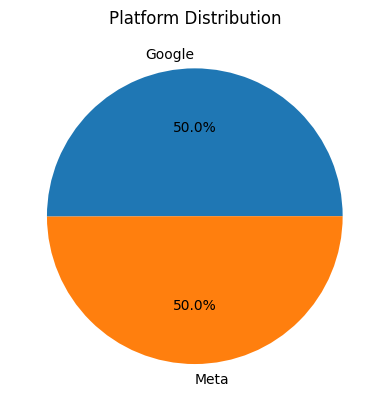

In [ ]:
df["Platform"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Platform Distribution")
plt.show()


In [ ]:
df["Locations"].head(20)


0               Harmada,Raja Park,Mahesh Nagar,C Scheme
1               Harmada,Raja Park,Mahesh Nagar,C Scheme
2               Harmada,Raja Park,Mahesh Nagar,C Scheme
3               Harmada,Raja Park,Mahesh Nagar,C Scheme
4               Harmada,Raja Park,Mahesh Nagar,C Scheme
5               Harmada,Raja Park,Mahesh Nagar,C Scheme
6               Harmada,Raja Park,Mahesh Nagar,C Scheme
7               Harmada,Raja Park,Mahesh Nagar,C Scheme
8               Harmada,Raja Park,Mahesh Nagar,C Scheme
9               Harmada,Raja Park,Mahesh Nagar,C Scheme
10    Vidhyadhar Nagar,Chitrakoot,Jagatpura,Ambabari...
11    Vidhyadhar Nagar,Chitrakoot,Jagatpura,Ambabari...
12    Vidhyadhar Nagar,Chitrakoot,Jagatpura,Ambabari...
13    Vidhyadhar Nagar,Chitrakoot,Jagatpura,Ambabari...
14    Vidhyadhar Nagar,Chitrakoot,Jagatpura,Ambabari...
15    Vidhyadhar Nagar,Chitrakoot,Jagatpura,Ambabari...
16    Vidhyadhar Nagar,Chitrakoot,Jagatpura,Ambabari...
17    Vidhyadhar Nagar,Chitrakoot,Jagatpura,Amba

In [ ]:
df[["Total_Budget","Daily_Budget"]].describe()


,Total_Budget,Daily_Budget
count,100000.00000,100000.000000
mean,2897.53590,694.577700
std,1212.39229,290.659991
min,800.00000,200.000000
25%,1846.00000,437.000000
50%,2910.50000,694.000000
75%,3947.00000,949.000000
max,5000.00000,1200.000000


In [ ]:
df[["Keyword","Headline","Ad_Description","Image_Prompt"]].head(20)


,Keyword,Headline,Ad_Description,Image_Prompt
0,urban styles specially tailored for modern lif...,stylish wear created for smart appearance expl...,urban styles specially tailored for modern lif...,premium fashion that feels for active routine ...
1,elegant apparel specially created for everyday...,modern outfits specially prepared for lasting ...,premium fashion that feels for active routine ...,made for premium garments lovers explore now
2,premium fashion that feels for active routine ...,premium fashion that feels for active routine ...,made for premium garments lovers explore now,made sleek fashion for active routine explore now
3,made for premium garments lovers explore now,made for premium garments lovers explore now,crafted sleek outfits for active routine explo...,grab the offer and enjoy smart styles for last...
4,modern outfits specially crafted for modern li...,modern outfits specially crafted for modern li...,created trendy designs for active routine disc...,smart fashion curated for premium feel refresh...
5,made sleek fashion for active routine explore now,crafted sleek outfits for active routine explo...,grab the offer and enjoy smart styles for last...,comfortable clothing curated for effortless we...
6,refresh your wardrobe with premium wear for ef...,made sleek fashion for active routine explore now,made sleek fashion for active routine explore now,bold apparel made for lasting durability grab ...
7,grab the offer and enjoy smart styles for last...,refresh your wardrobe with premium wear for ef...,bold collection specially curated for modern l...,experience better fashion your sleek apparel f...
8,bold collection specially curated for modern l...,grab the offer and enjoy smart styles for last...,refresh your wardrobe with premium wear for ef...,minimal outfits specially designed for premium...
9,minimal clothing curated for smart appearance ...,modern outfits designed for smart appearance u...,smart fashion curated for premium feel refresh...,crafted stylish styles for smart appearance ex...


In [ ]:
# ========= REGENERATE FUNCTIONS =========

def regenerate_headlines():
    df["Headline"] = generate_unique_sentences(len(df))
    print("Headlines regenerated")


def regenerate_descriptions():
    df["Ad_Description"] = generate_unique_sentences(len(df))
    print("Descriptions regenerated")


def regenerate_prompts():
    df["Image_Prompt"] = generate_unique_sentences(len(df))
    print("Prompts regenerated")


def regenerate_keywords():
    df["Keyword"] = generate_unique_sentences(len(df))
    print("Keywords regenerated")


def regenerate_all():
    regenerate_keywords()
    regenerate_headlines()
    regenerate_descriptions()
    regenerate_prompts()
    print("All creatives regenerated successfully")


In [ ]:
regenerate_headlines()


Headlines regenerated


In [ ]:
regenerate_prompts()



Prompts regenerated


In [ ]:
regenerate_all()


Keywords regenerated
Headlines regenerated
Descriptions regenerated
Prompts regenerated
All creatives regenerated successfully


In [ ]:
import re


def get_number(text, default=5):
    nums = re.findall(r'\d+', text)
    return int(nums[0]) if nums else default


# 🔥 column aliases (smart matching)
ALIASES = {
    "headline": "Headline",
    "headlines": "Headline",
    "keyword": "Keyword",
    "keywords": "Keyword",
    "prompt": "Image_Prompt",
    "prompts": "Image_Prompt",
    "description": "Ad_Description",
    "desc": "Ad_Description",
    "budget": "Total_Budget",
    "platform": "Platform"
}


while True:

    q = input("Ask anything >> ").lower().strip()

    if "exit" in q:
        break

    n = get_number(q)


    # 🔹 user filter
    if "user" in q:
        display(df[df["User_ID"] == n])
        continue


    # 🔹 search
    if "search" in q or "find" in q:
        word = q.split()[-1]
        result = df[df.astype(str).apply(lambda x: x.str.contains(word, case=False)).any(axis=1)]
        display(result.head(n))
        continue


    # 🔹 alias based matching (🔥 NEW FIX)
    matched = False

    for key, col in ALIASES.items():
        if key in q:
            display(df[col].sample(n))
            matched = True
            break

    if matched:
        continue


    # 🔹 stats
    if "stats" in q or "summary" in q:
        display(df.describe())
        continue


    # 🔹 default random rows
    display(df.sample(n))


67220      created for sleek apparel lovers grab the offer
47529    classic wardrobe curated for effortless wear s...
40625    modern garments specially curated for effortle...
49889    shop today with trendy outfits for active routine
27818    grab the offer with minimal styles for modern ...
34086    sleek outfits specially made for active routin...
27738    trendy wear that feels for lasting durability ...
38817    vibrant wardrobe specially tailored for lastin...
98808    urban garments curated for effortless wear dis...
45660    bold designs tailored for modern lifestyle upg...
Name: Image_Prompt, dtype: str

,User_ID,Ad_No,Category,User_Description,Price,Price_Range,Gender,Age_Min,Age_Max,Age_Range,Locations,Platform,Format,Total_Budget,Daily_Budget,Keyword,Headline,Ad_Description,Image_Prompt
46211,4622,2,Clothing,User provided clothing campaign text 4622,2233,2033-2733,Other,1,100,one to hundred,"Civil Lines,Agra Road,Hasanpura,Heerapura",Meta,Image,1255,285,designed classic collection for premium feel g...,explore now your minimal garments for active r...,smart apparel tailored for lasting durability ...,comfortable garments specially created for act...
6166,617,7,Clothing,User provided clothing campaign text 617,2994,2794-3494,Other,1,100,one to hundred,"Sitapura,Jhotwara,Ambabari,Bhankrota,Transport...",Google,Image,2020,974,built refined designs for everyday comfort exp...,refined outfits prepared for everyday comfort ...,minimal apparel made for effortless wear upgra...,discover more with comfortable clothing for ev...
13218,1322,9,Clothing,User provided clothing campaign text 1322,2154,1954-2654,Transgender,1,100,one to hundred,"Bhankrota,Agra Road,Kalwar Road,Mahapura,Sitap...",Google,Image,1022,785,sleek outfits curated for lasting durability u...,refresh your wardrobe and enjoy comfortable ou...,shop today and enjoy minimal collection for sm...,grab the offer with trendy collection for acti...
46880,4689,1,Clothing,User provided clothing campaign text 4689,920,720-1420,Transgender,1,100,one to hundred,"Bapu Nagar,Jamwa Ramgarh,Ajmer Road,Tilak Nagar",Google,Image,4265,396,designed modern clothing for premium feel expe...,made modern garments for modern lifestyle expl...,stylish collection specially tailored for last...,designed sleek collection for modern lifestyle...
46325,4633,6,Clothing,User provided clothing campaign text 4633,853,653-1353,Male,1,100,one to hundred,"Malviya Nagar,Sirsi Extension,Durgapura,Bagru,...",Meta,Image,830,202,bold clothing specially designed for effortles...,shop today your smart fashion for lasting dura...,grab the offer with bold wardrobe for lasting ...,experience better fashion your bold garments f...


,User_ID,Ad_No,Category,User_Description,Price,Price_Range,Gender,Age_Min,Age_Max,Age_Range,Locations,Platform,Format,Total_Budget,Daily_Budget,Keyword,Headline,Ad_Description,Image_Prompt
80645,8065,6,Clothing,User provided clothing campaign text 8065,2361,2161-2861,Female,1,100,one to hundred,"Jhotwara,Adarsh Nagar,SFS Mansarovar,Bani Park...",Meta,Image,4934,870,elegant apparel specially made for everyday co...,refined collection curated for lasting durabil...,smart outfits designed for smart appearance up...,sleek wear specially designed for modern lifes...
45766,4577,7,Clothing,User provided clothing campaign text 4577,2209,2009-2709,Male,1,100,one to hundred,"Ajmer Road,Gopalpura Bypass,Amer Road,Jagatpur...",Meta,Image,4915,1034,sleek collection designed for active routine r...,classic designs that feels for effortless wear...,experience better fashion with classic designs...,curated bold wardrobe for confident look grab ...
37872,3788,3,Clothing,User provided clothing campaign text 3788,2572,2372-3072,Other,1,100,one to hundred,"Jagatpura,Nirman Nagar,Subhash Nagar,Gopalpura...",Google,Video,2839,257,refresh your wardrobe your sleek wear for ever...,explore now and enjoy vibrant outfits for effo...,comfortable apparel tailored for everyday comf...,discover more with bold fashion for effortless...
32292,3230,3,Clothing,User provided clothing campaign text 3230,2753,2553-3253,Other,1,100,one to hundred,"Patrakar Colony,Bani Park,Jhotwara,SFS Mansaro...",Google,Image,1755,989,vibrant fashion specially designed for active ...,minimal clothing that feels for effortless wea...,discover more and enjoy premium collection for...,curated classic styles for everyday comfort ex...
85619,8562,10,Clothing,User provided clothing campaign text 8562,2964,2764-3464,Female,1,100,one to hundred,"Ajmer Road,Heerapura,Shyam Nagar,Triveni Nagar...",Google,Image,3862,995,prepared comfortable wear for smart appearance...,created for sleek designs lovers upgrade your ...,fresh garments made for premium feel experienc...,refined garments crafted for active routine up...


,User_ID,Ad_No,Category,User_Description,Price,Price_Range,Gender,Age_Min,Age_Max,Age_Range,Locations,Platform,Format,Total_Budget,Daily_Budget,Keyword,Headline,Ad_Description,Image_Prompt
62602,6261,3,Clothing,User provided clothing campaign text 6261,1801,1601-2301,Male,1,100,one to hundred,"Mahesh Nagar,Shastri Nagar,Bindayaka,Nirman Na...",Google,Image,4634,1199,explore now and enjoy stylish apparel for effo...,explore now and enjoy urban styles for premium...,classic clothing made for modern lifestyle sho...,smart fashion made for smart appearance grab t...
75697,7570,8,Clothing,User provided clothing campaign text 7570,1257,1057-1757,Other,1,100,one to hundred,"Vatika,Tonk Road,Raja Park,Nirman Nagar,Harmada",Meta,Video,1448,453,crafted minimal fashion for lasting durability...,urban fashion specially prepared for modern li...,curated for elegant collection lovers refresh ...,experience better fashion and enjoy refined de...
18529,1853,10,Clothing,User provided clothing campaign text 1853,986,786-1486,Transgender,1,100,one to hundred,"Adarsh Nagar,Jobner Road,Mahapura,Shyam Nagar,...",Meta,Video,3936,1165,tailored urban styles for everyday comfort upg...,refresh your wardrobe and enjoy trendy collect...,classic wardrobe specially crafted for confide...,modern fashion that feels for everyday comfort...
16363,1637,4,Clothing,User provided clothing campaign text 1637,1315,1115-1815,Other,1,100,one to hundred,"Vaishali Nagar,Kukas,Bagru,Gopalpura,Beelwa,Ni...",Google,Image,1926,1142,shop today with stylish garments for smart app...,made elegant wear for lasting durability grab ...,minimal wear specially made for active routine...,crafted for elegant clothing lovers experience...
883,89,4,Clothing,User provided clothing campaign text 89,2320,2120-2820,Male,1,100,one to hundred,"Lal Kothi,Bapu Nagar,Achrol,Chitrakoot,Triveni...",Google,Video,3108,1165,discover more with comfortable collection for ...,vibrant outfits prepared for effortless wear d...,comfortable designs tailored for active routin...,tailored premium clothing for active routine d...


,User_ID,Ad_No,Category,User_Description,Price,Price_Range,Gender,Age_Min,Age_Max,Age_Range,Locations,Platform,Format,Total_Budget,Daily_Budget,Keyword,Headline,Ad_Description,Image_Prompt
81347,8135,8,Clothing,User provided clothing campaign text 8135,2380,2180-2880,Other,1,100,one to hundred,"Phagi,Vidhyadhar Nagar,Sirsi Extension,Amer Ro...",Meta,Video,1450,757,upgrade your style with trendy collection for ...,fresh clothing crafted for premium feel discov...,crafted for stylish styles lovers experience b...,bold wardrobe specially crafted for premium fe...
7478,748,9,Clothing,User provided clothing campaign text 748,1337,1137-1837,Transgender,1,100,one to hundred,"Brahmpuri,Sitapura,Murlipura,Tilak Nagar",Google,Image,2188,931,prepared vibrant clothing for smart appearance...,minimal garments specially made for smart appe...,built urban styles for premium feel explore now,premium apparel that feels for smart appearanc...
99899,9990,10,Clothing,User provided clothing campaign text 9990,2010,1810-2510,Female,1,100,one to hundred,"Bindayaka,Murlipura,Raja Park,Hasanpura,Brahmpuri",Google,Image,1461,626,tailored for trendy designs lovers refresh you...,stylish apparel curated for active routine exp...,crafted for trendy designs lovers explore now,grab the offer your trendy designs for effortl...
81904,8191,5,Clothing,User provided clothing campaign text 8191,2797,2597-3297,Male,1,100,one to hundred,"Nirman Nagar,Beelwa,Sirsi Road,Jamwa Ramgarh",Meta,Image,1681,281,curated premium apparel for lasting durability...,upgrade your style and enjoy urban designs for...,smart apparel specially built for effortless w...,bold styles specially designed for lasting dur...
7162,717,3,Clothing,User provided clothing campaign text 717,2435,2235-2935,Transgender,1,100,one to hundred,"Civil Lines,Jobner Road,New Sanganer Road,Bhan...",Google,Video,894,280,vibrant collection specially prepared for conf...,sleek designs made for effortless wear refresh...,refresh your wardrobe your comfortable wear fo...,curated for trendy garments lovers experience ...
